<ipython-input-1-3e05ee6bdf50>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('indexData.csv', date_parser=True)


  ï»¿Index        Date        Open        High         Low       Close  \
0      NYA  1965-12-31  528.690002  528.690002  528.690002  528.690002   
1      NYA  1966-01-03  527.210022  527.210022  527.210022  527.210022   
2      NYA  1966-01-04  527.840027  527.840027  527.840027  527.840027   
3      NYA  1966-01-05  531.119995  531.119995  531.119995  531.119995   
4      NYA  1966-01-06  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0  
        Close
0  528.690002
1  527.210022
2  527.840027
3  531.119995
4  532.070007
Close    681
dtype: int64
[[0.01431513]
 [0.01427041]
 [0.01428945]
 ...
 [0.4850028 ]
 [0.4830088 ]
 [0.48263115]]

Training data shape: (40454, 1)
Testing data shape: (10114, 1)

Shape of X_train: (40394, 60)
Shape of y_train: (40394,)
Shape of X_test: (10054, 60)
Shape of y_test: (10054,)

Reshaped X_train for LSTM: (40394

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - loss: 0.0012 - val_loss: 1.8381e-05
Epoch 2/3
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 137s 68ms/step - loss: 1.5116e-04 - val_loss: 9.3978e-05
Epoch 3/3
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 141s 67ms/step - loss: 6.0205e-05 - val_loss: 8.6334e-05
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


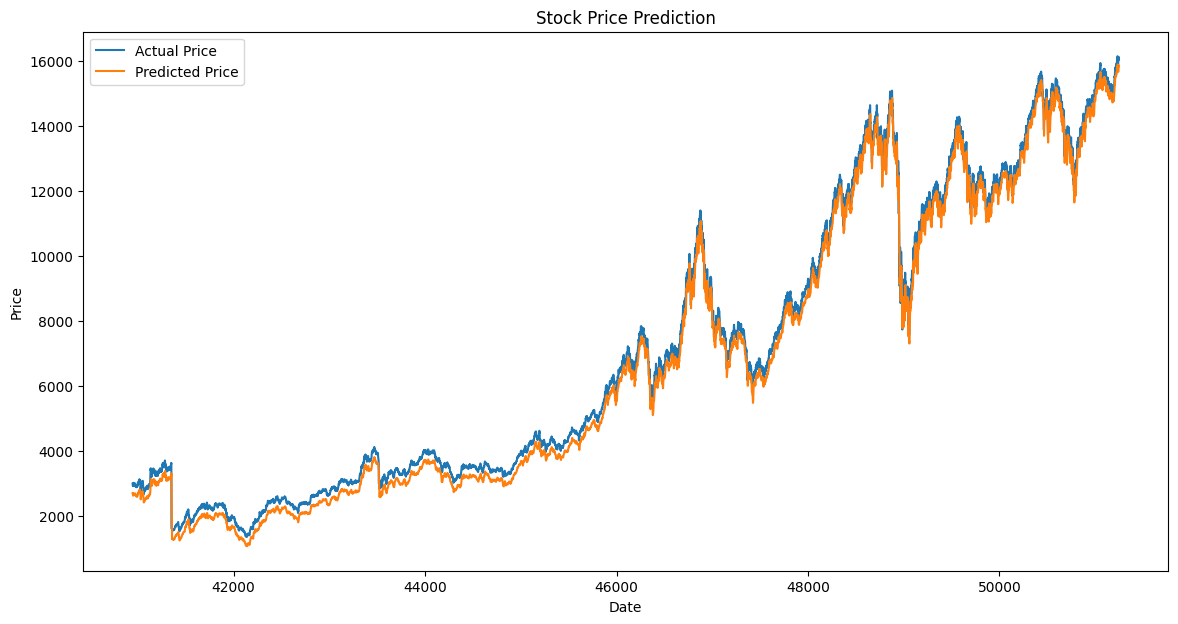

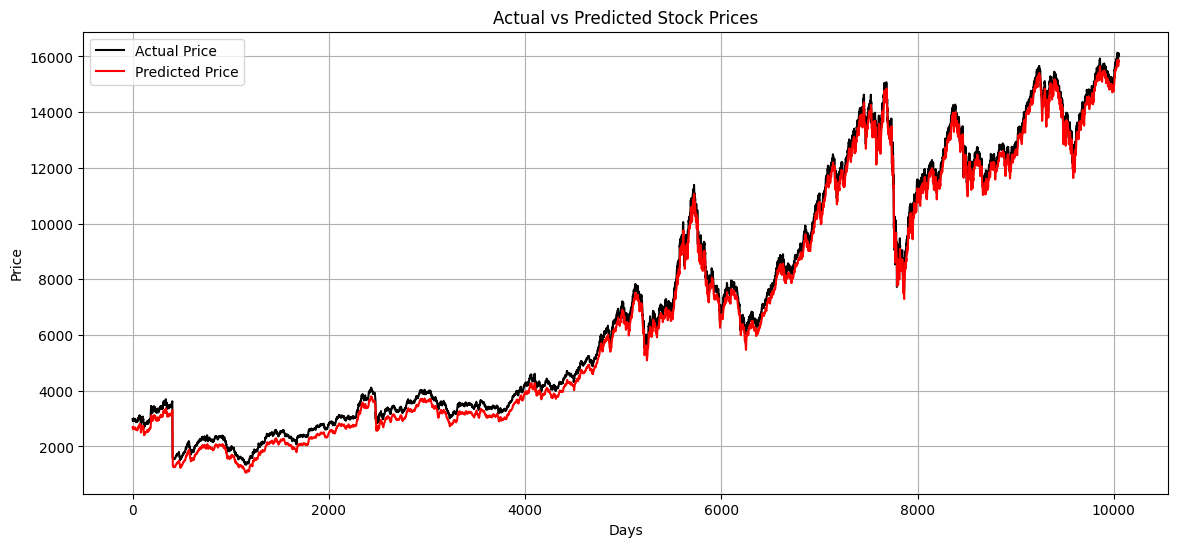

y_test shape: (10054,)
predictions shape: (10054, 1)
Any NaN in y_test? False
Any NaN in predictions? False
Mean Squared Error (MSE): 94584.2454
Root Mean Squared Error (RMSE): 307.5455
Mean Absolute Error (MAE): 295.2355


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
df = pd.read_csv('indexData.csv', date_parser=True)
print(df.head())

# Use 'Close' price for prediction
df = df[['Close']]
print(df.head())

 # Check for any missing values
print(df.isnull().sum())
df = df.dropna()

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)
print(scaled_data[:])

# Prepare data for LSTM
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

print(f"\nTraining data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Create dataset with 60 timesteps
def create_dataset(data, timesteps=60):
    X, y = [], []
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Reshape input to be compatible with LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"\nReshaped X_train for LSTM: {X_train.shape}")
print(f"Reshaped X_test for LSTM: {X_test.shape}")

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Predict stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df.index[train_size+60:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
plt.plot(df.index[train_size+60:], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


import seaborn as sns
# Visual comparison of actual vs predicted
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 6))
plt.plot(actual_prices, color='black', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print(f"y_test shape: {y_test.shape}")
print(f"predictions shape: {predictions.shape}")

print("Any NaN in y_test?", np.isnan(y_test).any())
print("Any NaN in predictions?", np.isnan(predictions).any())


# Rescale y_test from scaled data
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Replace NaN values in actual_prices with 0
# You can also replace with mean or median based on your preference
actual_prices = np.nan_to_num(actual_prices)

# Ensure lengths match
min_len = min(len(actual_prices), len(predictions))
actual_prices = actual_prices[:min_len]
predictions = predictions[:min_len]

# Replace NaN values in predictions with 0
# You can also replace with mean or median based on your preference
predictions = np.nan_to_num(predictions)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

model.save('stock_price.h5')